## ----------------------------------------------------------------Extract data from Excel spreadsheet--------------------------------------------------------
## DATASET:	https://data.europa.eu/data/datasets/96a8a41e-b5ff-4cda-8bce-5fc1bcf43db9?locale=en

## Performed below steps on excel before loading the dataset
DISTRICT_NUMBER			=IF(LEN(F2) = 8, LEFT(F2,2), LEFT(F2,1))
PGR_FORECAST_ROOM		=IF(LEN(F2) = 8, MID(F2,3,2), MID(F2,2,2))
BZR_DISTRICT_REGION		=IF(LEN(F2) = 8, MID(F2,5,2), MID(F2,4,2))
PLR_PLANNING_ROOM_NUMBER=RIGHT(F2,2)

Replaced the Districts as per below:
1:Mitte
2:Friedrichshain-Kreuzberg
3:Pankow
4:Charlottenburg-Wilmersdorf
5:Spandau
6:Steglitz-Zehlendorf
7:Tempelhof-Schöneberg
8:Neukölln
9:Treptow-Köpenick
10:Marzahn-Hellersdorf
11:Lichtenberg
12:Reinickendorf


## ----------------------------------------------------------------Extraction --------------------------------

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

df =pd.read_csv("D:\Dipali Portfolio\BicycleDataset\BikeTheft.csv",encoding="ISO-8859-1")
df.head()

C:\Users\marth\AppData\Local\Temp\ipykernel_18596\4139145944.py:4: DtypeWarning: Columns (0,1,3,7,8,9,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv("D:\Dipali Portfolio\BicycleDataset\BikeTheft.csv",encoding="ISO-8859-1")


,RECORDED_ON,CRIME_START_DATE,CRIME_START_HOUR,CRIME_END_DATE,CRIME_END_HOUR,LOR,DAMAGE_COST,CRIME_ATTEMPT,BICYCLE_TYPE,THEFT_TYPE,REASON_FOR_RECORDING,DISTRICT_NUMBER,PGR_FORECAST_ROOM,BZR_DISTRICT_REGION,PLR_PLANNING_ROOM_NUMBER,DISTRICT_NAME
0,02.11.2023,01.11.2023,13.0,01.11.2023,17.0,12601236.0,1000.0,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,12.0,60.0,12.0,36.0,Reinickendorf
1,17.07.2023,16.07.2023,21.0,17.07.2023,7.0,12601236.0,1000.0,Nein,Fahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrrädern,12.0,60.0,12.0,36.0,Reinickendorf
2,17.07.2023,16.07.2023,22.0,17.07.2023,4.0,12601236.0,1418.0,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,12.0,60.0,12.0,36.0,Reinickendorf
3,29.06.2023,28.06.2023,16.0,29.06.2023,16.0,12601236.0,250.0,Nein,Kinderfahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrrädern,12.0,60.0,12.0,36.0,Reinickendorf
4,25.04.2023,24.04.2023,22.0,25.04.2023,0.0,12601236.0,3327.0,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,12.0,60.0,12.0,36.0,Reinickendorf


## ----------------------------------------------------------------Exploration----------------------------------------------------

In [83]:
df.shape

(1048574, 16)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RECORDED_ON               22127 non-null  object 
 1   CRIME_START_DATE          22127 non-null  object 
 2   CRIME_START_HOUR          22127 non-null  float64
 3   CRIME_END_DATE            22127 non-null  object 
 4   CRIME_END_HOUR            22127 non-null  float64
 5   LOR                       22127 non-null  float64
 6   DAMAGE_COST               22127 non-null  float64
 7   CRIME_ATTEMPT             22127 non-null  object 
 8   BICYCLE_TYPE              22127 non-null  object 
 9   THEFT_TYPE                22127 non-null  object 
 10  REASON_FOR_RECORDING      22127 non-null  object 
 11  DISTRICT_NUMBER           22127 non-null  float64
 12  PGR_FORECAST_ROOM         22127 non-null  float64
 13  BZR_DISTRICT_REGION       22127 non-null  float64
 14  PL

In [85]:
## Checking and displaying the count of missing values in each column.

df.isnull().sum()

RECORDED_ON                 1026447
CRIME_START_DATE            1026447
CRIME_START_HOUR            1026447
CRIME_END_DATE              1026447
CRIME_END_HOUR              1026447
LOR                         1026447
DAMAGE_COST                 1026447
CRIME_ATTEMPT               1026447
BICYCLE_TYPE                1026447
THEFT_TYPE                  1026447
REASON_FOR_RECORDING        1026447
DISTRICT_NUMBER             1026447
PGR_FORECAST_ROOM           1026447
BZR_DISTRICT_REGION         1026447
PLR_PLANNING_ROOM_NUMBER    1026447
DISTRICT_NAME               1026447
dtype: int64

In [87]:
## Removing rows where all values are null.
df = df.dropna(how='all')
df.isnull().sum()

RECORDED_ON                 0
CRIME_START_DATE            0
CRIME_START_HOUR            0
CRIME_END_DATE              0
CRIME_END_HOUR              0
LOR                         0
DAMAGE_COST                 0
CRIME_ATTEMPT               0
BICYCLE_TYPE                0
THEFT_TYPE                  0
REASON_FOR_RECORDING        0
DISTRICT_NUMBER             0
PGR_FORECAST_ROOM           0
BZR_DISTRICT_REGION         0
PLR_PLANNING_ROOM_NUMBER    0
DISTRICT_NAME               0
dtype: int64

In [88]:
df.describe(include="all")

,RECORDED_ON,CRIME_START_DATE,CRIME_START_HOUR,CRIME_END_DATE,CRIME_END_HOUR,LOR,DAMAGE_COST,CRIME_ATTEMPT,BICYCLE_TYPE,THEFT_TYPE,REASON_FOR_RECORDING,DISTRICT_NUMBER,PGR_FORECAST_ROOM,BZR_DISTRICT_REGION,PLR_PLANNING_ROOM_NUMBER,DISTRICT_NAME
count,22127,22127,22127.000000,22127,22127.000000,2.212700e+04,22127.000000,22127,22127,22127,22127,22127.000000,22127.000000,22127.000000,22127.000000,22127
unique,379,379,NaN,379,NaN,NaN,NaN,3,8,2,4,NaN,NaN,NaN,NaN,12
top,25.09.2023,15.09.2023,NaN,25.09.2023,NaN,NaN,NaN,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,NaN,NaN,NaN,NaN,Mitte
freq,121,120,NaN,120,NaN,NaN,NaN,22020,10050,20798,19657,NaN,NaN,NaN,NaN,3321
mean,NaN,NaN,14.582591,NaN,13.438650,5.542103e+06,1151.737967,NaN,NaN,NaN,NaN,5.236589,30.485380,6.372622,23.317124,NaN
std,NaN,NaN,5.369114,NaN,5.422444,3.414909e+06,1142.846193,NaN,NaN,NaN,NaN,3.428578,16.737126,4.067622,14.624097,NaN
min,NaN,NaN,0.000000,NaN,0.000000,1.100101e+06,0.000000,NaN,NaN,NaN,NaN,1.000000,10.000000,1.000000,1.000000,NaN
25%,NaN,NaN,10.000000,NaN,9.000000,2.400623e+06,470.000000,NaN,NaN,NaN,NaN,2.000000,10.000000,3.000000,11.000000,NaN
50%,NaN,NaN,16.000000,NaN,14.000000,4.501043e+06,799.000000,NaN,NaN,NaN,NaN,4.000000,30.000000,6.000000,22.000000,NaN
75%,NaN,NaN,19.000000,NaN,18.000000,8.100314e+06,1399.000000,NaN,NaN,NaN,NaN,8.000000,40.000000,9.000000,35.000000,NaN


# Based on the provided summary statistics for your dataset, here are some insights that can be drawn:
# There are a total of 22,127 records in the dataset.
# The crime start hour has a mean of approximately betweeen 14 and 15 hours
# The DAMAGE_COST column has a mean of approximately 1,151.74, with a minimum of 0 and a maximum of 10,000. T
# Most common bicycle type: Herrenfahrrad.
# The dataset covers multiple districts in Berlin, with "Mitte" being the most frequent district.

In [89]:
pd.set_option('display.max_columns', None)

df['RecordedDay'] = pd.to_datetime(df['RECORDED_ON'], format="%d.%m.%Y").dt.day.astype(int)
df['RecordedMonth'] = pd.to_datetime(df['RECORDED_ON'], format="%d.%m.%Y").dt.month_name()
df['RecordedYear'] = pd.to_datetime(df['RECORDED_ON'], format="%d.%m.%Y").dt.year.astype(int)
df['RecordedDayOfWeek'] =  pd.to_datetime(df['RECORDED_ON'], format="%d.%m.%Y").dt.day_name()

df['CrimeStartDay'] = pd.to_datetime(df['CRIME_START_DATE'], format="%d.%m.%Y").dt.day.astype(int)
df['CrimeStartMonth'] = pd.to_datetime(df['CRIME_START_DATE'], format="%d.%m.%Y").dt.month_name()
df['CrimeStartYear'] = pd.to_datetime(df['CRIME_START_DATE'], format="%d.%m.%Y").dt.year.astype(int)
df['CrimeStartDayOfWeek'] =  pd.to_datetime(df['CRIME_START_DATE'], format="%d.%m.%Y").dt.day_name()

df['CrimeEndDay'] = pd.to_datetime(df['CRIME_END_DATE'], format="%d.%m.%Y").dt.day.astype(int)
df['CrimeEndMonth'] = pd.to_datetime(df['CRIME_END_DATE'], format="%d.%m.%Y").dt.month_name()
df['CrimeEndYear'] = pd.to_datetime(df['CRIME_END_DATE'], format="%d.%m.%Y").dt.year.astype(int)
df['CrimeEndDayOfWeek'] =  pd.to_datetime(df['CRIME_END_DATE'], format="%d.%m.%Y").dt.day_name()

df.head()

,RECORDED_ON,CRIME_START_DATE,CRIME_START_HOUR,CRIME_END_DATE,CRIME_END_HOUR,LOR,DAMAGE_COST,CRIME_ATTEMPT,BICYCLE_TYPE,THEFT_TYPE,REASON_FOR_RECORDING,DISTRICT_NUMBER,PGR_FORECAST_ROOM,BZR_DISTRICT_REGION,PLR_PLANNING_ROOM_NUMBER,DISTRICT_NAME,RecordedDay,RecordedMonth,RecordedYear,RecordedDayOfWeek,CrimeStartDay,CrimeStartMonth,CrimeStartYear,CrimeStartDayOfWeek,CrimeEndDay,CrimeEndMonth,CrimeEndYear,CrimeEndDayOfWeek
0,02.11.2023,01.11.2023,13.0,01.11.2023,17.0,12601236.0,1000.0,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,12.0,60.0,12.0,36.0,Reinickendorf,2,November,2023,Thursday,1,November,2023,Wednesday,1,November,2023,Wednesday
1,17.07.2023,16.07.2023,21.0,17.07.2023,7.0,12601236.0,1000.0,Nein,Fahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrrädern,12.0,60.0,12.0,36.0,Reinickendorf,17,July,2023,Monday,16,July,2023,Sunday,17,July,2023,Monday
2,17.07.2023,16.07.2023,22.0,17.07.2023,4.0,12601236.0,1418.0,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,12.0,60.0,12.0,36.0,Reinickendorf,17,July,2023,Monday,16,July,2023,Sunday,17,July,2023,Monday
3,29.06.2023,28.06.2023,16.0,29.06.2023,16.0,12601236.0,250.0,Nein,Kinderfahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrrädern,12.0,60.0,12.0,36.0,Reinickendorf,29,June,2023,Thursday,28,June,2023,Wednesday,29,June,2023,Thursday
4,25.04.2023,24.04.2023,22.0,25.04.2023,0.0,12601236.0,3327.0,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,12.0,60.0,12.0,36.0,Reinickendorf,25,April,2023,Tuesday,24,April,2023,Monday,25,April,2023,Tuesday


In [90]:
# List of columns to convert to int
int_columns = ['CRIME_START_HOUR', 'CRIME_END_HOUR', 'DAMAGE_COST', 'DISTRICT_NUMBER',
               'PGR_FORECAST_ROOM', 'BZR_DISTRICT_REGION', 'PLR_PLANNING_ROOM_NUMBER']

# Apply int conversion to selected columns
df[int_columns] = df[int_columns].apply(lambda x: x.astype(int))

# Drop extra columns
columns_to_drop = ['RECORDED_ON', 'CRIME_START_DATE', 'CRIME_END_DATE', 'LOR', 'DISTRICT_NUMBER']
df.drop(columns=columns_to_drop, inplace=True)

# Display the modified DataFrame
df.head()


,CRIME_START_HOUR,CRIME_END_HOUR,DAMAGE_COST,CRIME_ATTEMPT,BICYCLE_TYPE,THEFT_TYPE,REASON_FOR_RECORDING,PGR_FORECAST_ROOM,BZR_DISTRICT_REGION,PLR_PLANNING_ROOM_NUMBER,DISTRICT_NAME,RecordedDay,RecordedMonth,RecordedYear,RecordedDayOfWeek,CrimeStartDay,CrimeStartMonth,CrimeStartYear,CrimeStartDayOfWeek,CrimeEndDay,CrimeEndMonth,CrimeEndYear,CrimeEndDayOfWeek
0,13,17,1000,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,60,12,36,Reinickendorf,2,November,2023,Thursday,1,November,2023,Wednesday,1,November,2023,Wednesday
1,21,7,1000,Nein,Fahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrrädern,60,12,36,Reinickendorf,17,July,2023,Monday,16,July,2023,Sunday,17,July,2023,Monday
2,22,4,1418,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,60,12,36,Reinickendorf,17,July,2023,Monday,16,July,2023,Sunday,17,July,2023,Monday
3,16,16,250,Nein,Kinderfahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrrädern,60,12,36,Reinickendorf,29,June,2023,Thursday,28,June,2023,Wednesday,29,June,2023,Thursday
4,22,0,3327,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,60,12,36,Reinickendorf,25,April,2023,Tuesday,24,April,2023,Monday,25,April,2023,Tuesday


In [92]:
df['BICYCLE_TYPE'].value_counts()

BICYCLE_TYPE
Herrenfahrrad        10050
Damenfahrrad          5756
Fahrrad               3382
Kinderfahrrad          924
Mountainbike           908
diverse Fahrräder      629
Rennrad                393
Lastenfahrrad           85
Name: count, dtype: int64

In [93]:
df['THEFT_TYPE'].value_counts()

THEFT_TYPE
Fahrraddiebstahl             20798
Keller- und Bodeneinbruch     1329
Name: count, dtype: int64

## Theft by day of the week

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Wednesday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Saturday')])

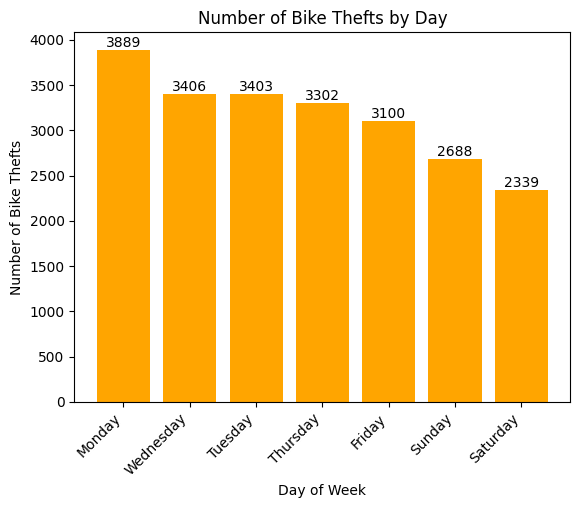

In [94]:
## Monday has high theft
## Launch public awareness campaigns to educate citizens about the increased risk of bike thefts on Mondays. 
## Encourage them to take extra precautions such as using secure bike locks and parking in well-lit areas.

df_week_day = df.groupby('RecordedDayOfWeek')['THEFT_TYPE'].count().sort_values(ascending=False)
df_week_day
bars = plt.bar(df_week_day.index, df_week_day.values, color='orange')

for bar, label in zip(bars, df_week_day.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label}', 
             ha='center', va='bottom')


bars = plt.bar(df_week_day.index, df_week_day.values, color='orange') 

plt.xlabel('Day of Week')
plt.ylabel('Number of Bike Thefts')
plt.title('Number of Bike Thefts by Day')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

## Theft by Month

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'June'),
  Text(1, 0, 'September'),
  Text(2, 0, 'July'),
  Text(3, 0, 'August'),
  Text(4, 0, 'May'),
  Text(5, 0, 'October'),
  Text(6, 0, 'March'),
  Text(7, 0, 'January'),
  Text(8, 0, 'November'),
  Text(9, 0, 'April'),
  Text(10, 0, 'February'),
  Text(11, 0, 'December')])

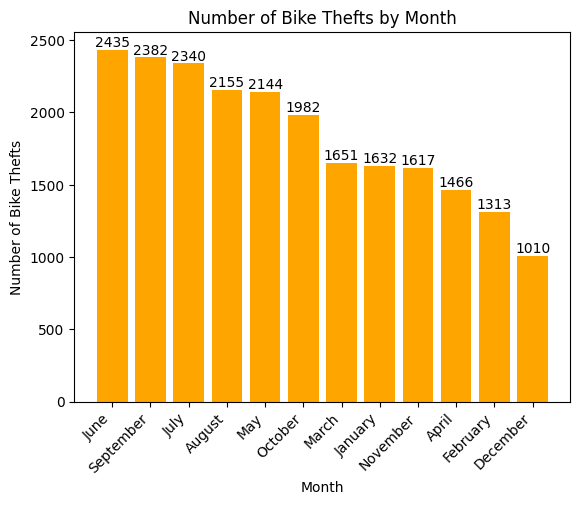

In [28]:
## JUNE has high theft
## Enhance security measures and surveillance during the peak months, especially in June.
## This could include deploying additional personnel, utilizing technology such as CCTV cameras, and increasing police presence in vulnerable areas.

df_month_day = df.groupby('RecordedMonth')['THEFT_TYPE'].count().sort_values(ascending=False)
df_month_day
for bar, label in zip(bars, df_month_day.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label}', 
             ha='center', va='bottom')


bars = plt.bar(df_month_day.index, df_month_day.values, color='orange') 

plt.xlabel('Month')
plt.ylabel('Number of Bike Thefts')
plt.title('Number of Bike Thefts by Month')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


## Theft by Tyoe of the Bike

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Herrenfahrrad'),
  Text(1, 0, 'Damenfahrrad'),
  Text(2, 0, 'Fahrrad'),
  Text(3, 0, 'Kinderfahrrad'),
  Text(4, 0, 'Mountainbike'),
  Text(5, 0, 'diverse Fahrräder'),
  Text(6, 0, 'Rennrad'),
  Text(7, 0, 'Lastenfahrrad')])

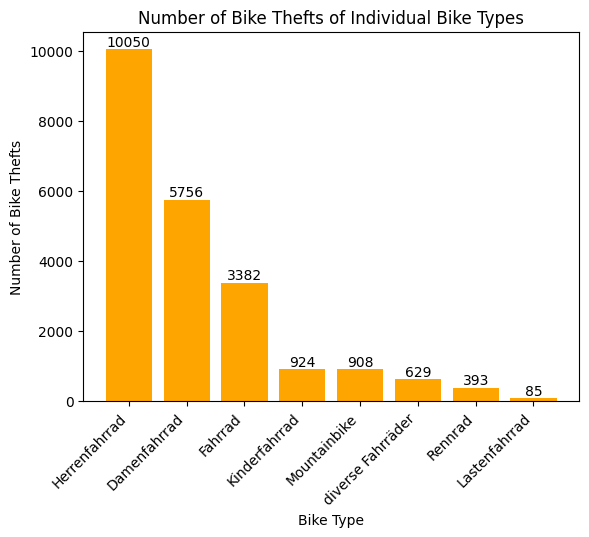

In [30]:
#Most Thefts are of Herrenfahrrad so it is to be recommended to promote bike registration programs, especially for Herrenfahrrad. 

# check which bike types are stolen the most

df_bike_type = df.groupby('BICYCLE_TYPE')['THEFT_TYPE'].count().sort_values(ascending=False)
df_bike_type
for bar, label in zip(bars, df_bike_type.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label}', 
             ha='center', va='bottom')


bars = plt.bar(df_bike_type.index, df_bike_type.values, color='orange') 

plt.xlabel('Bike Type')
plt.ylabel('Number of Bike Thefts')
plt.title('Number of Bike Thefts of Individual Bike Types')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


## Theft by District

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Mitte'),
  Text(1, 0, 'Friedrichshain-Kreuzberg'),
  Text(2, 0, 'Pankow'),
  Text(3, 0, 'Charlottenburg-Wilmersdorf'),
  Text(4, 0, 'Tempelhof-Schöneberg'),
  Text(5, 0, 'Treptow-Köpenick'),
  Text(6, 0, 'Neukölln'),
  Text(7, 0, 'Steglitz-Zehlendorf'),
  Text(8, 0, 'Lichtenberg'),
  Text(9, 0, 'Reinickendorf'),
  Text(10, 0, 'Marzahn-Hellersdorf'),
  Text(11, 0, 'Spandau')])

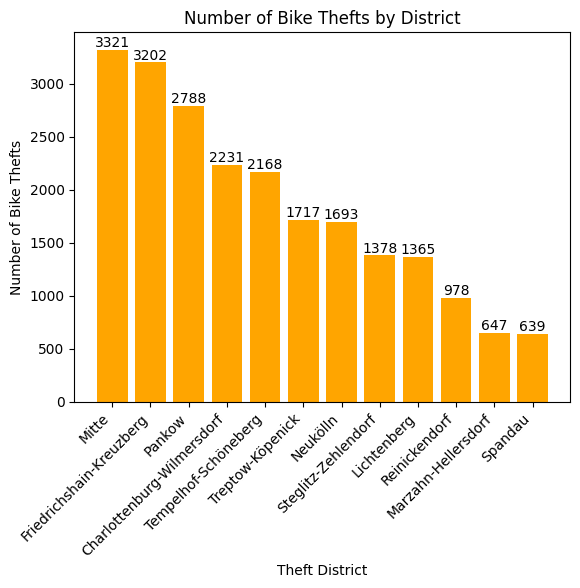

In [44]:
## Mitte has high theft

df_district = df.groupby('DISTRICT_NAME')['THEFT_TYPE'].count().sort_values(ascending=False)
df_district
bars = plt.bar(df_district.index, df_district.values, color='orange')

for bar, label in zip(bars, df_district.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label}', 
             ha='center', va='bottom')


bars = plt.bar(df_district.index, df_district.values, color='orange') 

plt.xlabel('Theft District')
plt.ylabel('Number of Bike Thefts')
plt.title('Number of Bike Thefts by District')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Kinderfahrrad'),
  Text(1, 0, 'Mountainbike'),
  Text(2, 0, 'Damenfahrrad'),
  Text(3, 0, 'Rennrad'),
  Text(4, 0, 'Herrenfahrrad'),
  Text(5, 0, 'Fahrrad'),
  Text(6, 0, 'diverse Fahrräder'),
  Text(7, 0, 'Lastenfahrrad')])

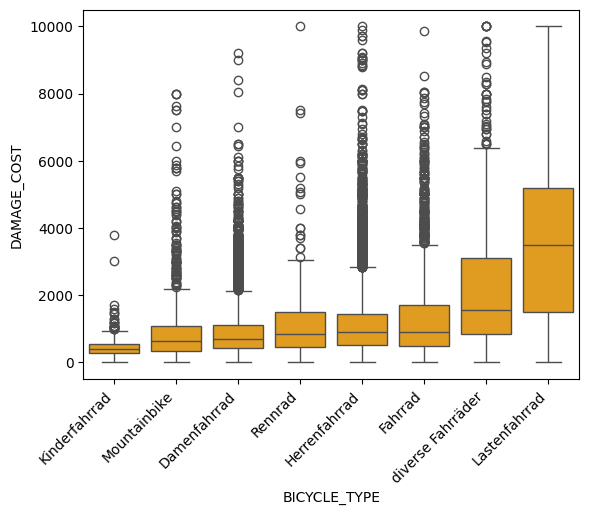

In [54]:
import seaborn as sns
median_damage = df.groupby('BICYCLE_TYPE')['DAMAGE_COST'].median().sort_values()

sns.boxplot(x='BICYCLE_TYPE', y='DAMAGE_COST', data=df, order=median_damage.index, color='orange')
plt.xticks(rotation=45, ha='right')

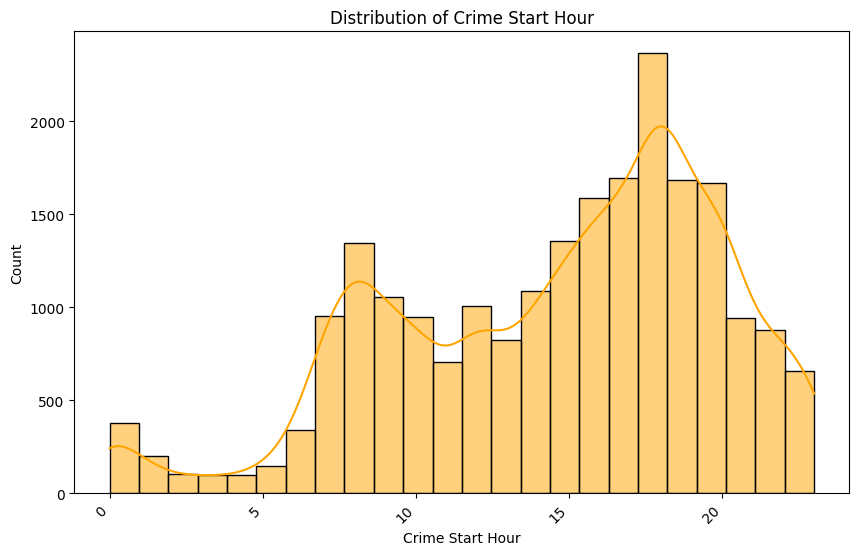

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot the count plot with KDE
sns.histplot(x='CRIME_START_HOUR', data=df, color='orange', bins=24, kde=True)

# Add labels and title
plt.xlabel('Crime Start Hour')
plt.ylabel('Count')
plt.title('Distribution of Crime Start Hour')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


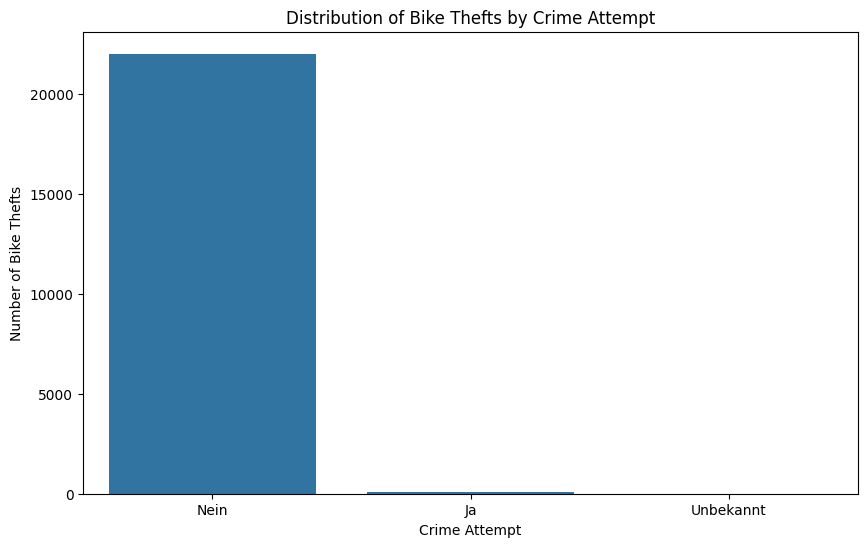

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CRIME_ATTEMPT', data=df)
plt.title('Distribution of Bike Thefts by Crime Attempt')
plt.xlabel('Crime Attempt')
plt.ylabel('Number of Bike Thefts')
plt.show()


C:\Users\marth\AppData\Local\Temp\ipykernel_18596\2239223530.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='RecordedMonth', y='DAMAGE_COST', data=df, estimator='count', ci=None, marker='o')


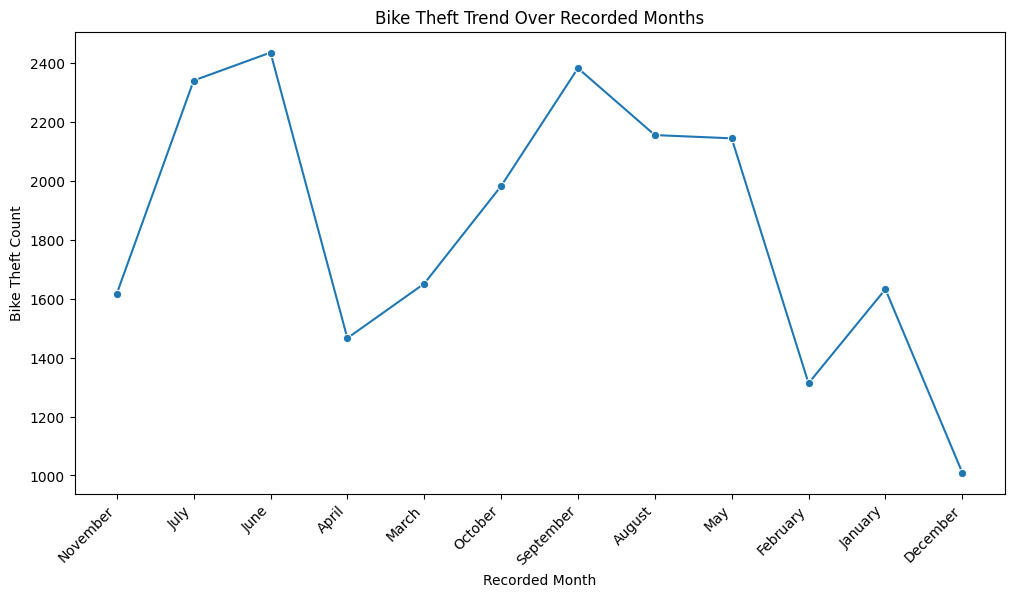

In [81]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot a line plot of bike thefts over Recorded Months
sns.lineplot(x='RecordedMonth', y='DAMAGE_COST', data=df, estimator='count', ci=None, marker='o')

# Add labels and title
plt.xlabel('Recorded Month')
plt.ylabel('Bike Theft Count')
plt.title('Bike Theft Trend Over Recorded Months')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


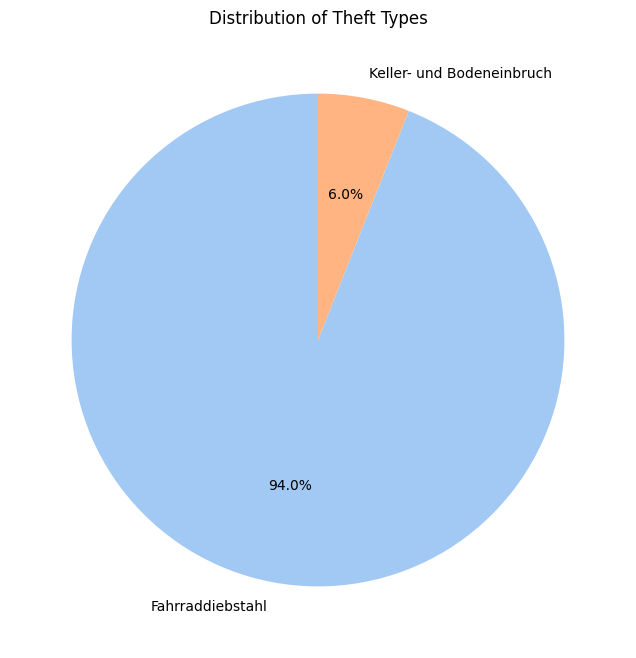

In [98]:
# Count the occurrences of each theft type
theft_type_counts = df['THEFT_TYPE'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(theft_type_counts, labels=theft_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Add a title
plt.title('Distribution of Theft Types')

# Show the plot
plt.show()
